# Module 1: Curve Fitting

This is a Jupyter Notebook started by James Toh (SN: 18020507) for PHAS0056 Practical Machine Learning. It will be used to explore Stochastic Gradient Descent for the purposes of curve fitting

In [12]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#setting initial values
theta = [0,1]
sigma = 0.5

## Defining the functions

Here I define two functions: the first, our polynomial function f(x) = $\sum_{i} \theta_{i} x^{i}$ + noise and the second, a 'true' variant with fixed theta which we will use as data and attempt to fit a curve to

In [16]:
def polyModelWithNoise(x,theta,sigma):
    '''
    x is a numpy array of x values, "theta" are the parameters of the polynomial such that y(x)=∑iθixi and sigma is the standard deviation of the noise distribution that is added        to the polynomial function
    Inputs:
        x: array of x-axis values
        theta: coefficient parameters of the polynomial
        sigma: size of the standard deviation of the noise added to the data
    Outputs: array of datapoints from the function with a certain amount of random noise added
    '''
    y = np.polynomial.polynomial.polyval(x,theta) #produces the sum of the polynomial in x, with the coefficients from theta
    noise = np.random.normal(scale=sigma, size=len(y)) #array of random gaussian numbers to add noise to the function
    return y + noise

def true_f(x):
    '''
    Returns a value of the polynomial function using a preset 'true' theta values to generate the dataset
    '''
    return polyModelWithNoise(x,[0,1],0.5)

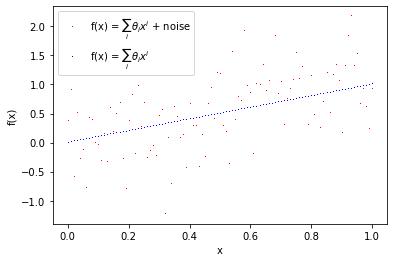

In [17]:
x = np.linspace(0,1,101) #generate x values
y = polyModelWithNoise(x,theta,sigma) #generate y plotting values, could have  used true_f instead here
y2 = polyModelWithNoise(x,theta,0)

#plotting the line
plt.figure()
plt.plot(x,y,',',label=r'f(x) = $\sum_{i} \theta_{i} x^{i}$ + noise',color='Red') #plot the values
plt.plot(x,y2,',',color='Blue',label=r'f(x) = $\sum_{i} \theta_{i} x^{i}$') #reference plot of the function
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc='Best')


I now define a function which is the gradient function of f(x), returning the values of f'($\theta_i$) at that point x as an i-dimenstional array

Example: if we had 3 x values and $ i_{max} $ was 1 (starting at 0)
        
        the function would return:
    
 $$   \big[ [f_{\theta_0},f_{\theta_1}] , [f_{\theta_0},f_{\theta_1}] , [f_{\theta_0},f_{\theta_1}] \big] $$

In [19]:
def polyGradient(x,theta):
    '''
    Returns the gradient of the polynomial function with respect to the parameters theta
    Inputs:
        x: array of x-axis values
        theta: coefficient parameters of the polynomial
    Outputs:
        grad: the gradient at that point
    '''
    grad = np.array([np.ones(len(x)), x])
    return grad

## Performing the Stochastic Gradient Descent

Now we will perform the SGD in order to fit a curve in certain dimensions to the data

This is achieved using a loop to iterate the value of theta

I am using a minibatch SGD method here, using a random batch of 10 datapoints and using the average gradient across those datapoints to calculate a better guess , which we try again with

In [20]:
theta = [-1,0.5] #starting theta guess
eta = 0.5 #learning rate
j = 1
steps = 100
while j <= steps: #while loop to iterate
    x = np.random.random(10) #10 random x values between 0 and 1
    y = true_f(x)
    y2 = polyModelWithNoise(x,theta,0) #our y guess, note the lack of noise used here
    deviation = y2 - y
    theta -= eta * np.average(deviation[None,:]*polyGradient(x,theta),axis=1) #our new theta guess. We alter the shape of the deviation array to match the gradient array
    j += 1

print("Steps completed:",j-1)
print(theta)

Steps completed: 100
[0.08171721 1.00789542]


## Fitting for a third-order polynomial

Now I will use this code to fit 1,3 and 7th order polynomials to a polynomial function which is third order with respect to x

Below I have redefined some functions to be used

In [7]:
def true_f2(x): #the new true polynomial, third order
    return polyModelWithNoise(x,[0,1,2,2],0.5)

## defining some new gradient functions
def polyGradient3(x,theta): #third order gradient function
    '''
    Returns ghe gradient of the polynomial function with respect to the parameters theta. For third order polynomials
    Inputs:
        x: array of x-axis values
        theta: coefficient parameters of the polynomial
    Outputs:
        grad: the gradient at that point
    '''
    grad = np.array([np.ones(len(x)), x, x**2, x**3])
    return grad

def polyGradient7(x,theta): #seventh order gradient function
    '''
    Returns ghe gradient of the polynomial function with respect to the parameters theta. For seventh order polynomials
    Inputs:
        x: array of x-axis values
        theta: coefficient parameters of the polynomial
    Outputs:
        grad: the gradient at that point
    '''
    grad = np.array([np.ones(len(x)), x, x**2, x**3, x**4, x**5, x**6, x**7])
    return grad

In [8]:
#first order line fit

theta = [-1,0.5]
eta = 0.5
j = 1
steps = 100
while j <= steps:
    x = np.random.random(10)
    y = true_f2(x)
    y2 = polyModelWithNoise(x,theta,0)
    deviation = y2 - y
    theta -= eta * np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    j += 1

print("Steps completed:",j-1)
print(theta)
print("Polynomial: {0:.4f} + {1:.4f}x".format(theta[0],theta[1]))
theta1 = theta

Steps completed: 100
[-0.41136963  4.74606575]
Polynomial: -0.4114 + 4.7461x


In [9]:
##third order curve fit
theta = [-1,0.5,1,1] #new guess theta
eta = 0.5
j = 1
steps = 100
while j <= steps:
    x = np.random.random(10)
    y = true_f2(x)
    y2 = polyModelWithNoise(x,theta,0)
    deviation = y2 - y
    theta -= eta * np.average(deviation[None,:]*polyGradient3(x,theta),axis=1)
    j += 1

print("Steps completed:",j-1)
print(theta)
print("Polynomial: {0:.4f} + {1:.4f}x +{2:.4f}x^2 + {3:.4f}x^3".format(theta[0],theta[1],theta[2],theta[3]))
theta3 = theta

Steps completed: 100
[-0.29329516  1.20707273  1.77594454  1.80365279]
Polynomial: -0.2933 + 1.2071x +1.7759x^2 + 1.8037x^3


In [10]:
##seventh order curve fit
theta = [-1,0.5,1,1,-1,-1,-1,0]
eta = 0.5
j = 1
steps = 100
while j <= steps:
    x = np.random.random(10)
    y = true_f2(x)
    y2 = polyModelWithNoise(x,theta,0)
    deviation = y2 - y
    theta -= eta * np.average(deviation[None,:]*polyGradient7(x,theta),axis=1)
    j += 1

print("Steps completed:",j-1)
print(theta)
print("Polynomial: {0:.4f} + {1:.4f}x +{2:.4f}x^2 + {3:.4f}x^3 + {4:.4f}x^4 + {5:.4f}x^5 + {6:.4f}x^6 + {7:.4f}x^7".format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7]))
theta7 = theta

Steps completed: 100
[ 0.08652834  1.3913736   1.91326357  1.89732061 -0.14397047 -0.19544421
 -0.24918424  0.69861944]
Polynomial: 0.0865 + 1.3914x +1.9133x^2 + 1.8973x^3 + -0.1440x^4 + -0.1954x^5 + -0.2492x^6 + 0.6986x^7


Text(0, 0.5, 'f(x)')

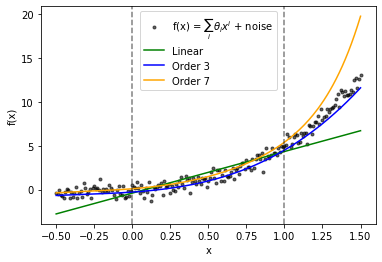

In [23]:
##plotting the different curve fits

x = np.linspace(-0.5,1.5,201)
plt.figure()
plt.plot(x,true_f2(x),'.',label=r'f(x) = $\sum_{i} \theta_{i} x^{i}$ + noise',color='black',alpha=0.6)
plt.plot(x,polyModelWithNoise(x,theta1,0),label='Linear',color='Green')
plt.plot(x,polyModelWithNoise(x,theta3,0),label='Order 3',color='Blue')
plt.plot(x,polyModelWithNoise(x,theta7,0),label='Order 7',color='Orange')
plt.axvline(0,ls='--',alpha=0.5,color='Black')
plt.axvline(1,ls='--',alpha=0.5,color='Black')
plt.legend(loc='Best')
plt.xlabel('x')
plt.ylabel('f(x)')

From the plot it can be seen that all three are reasonably good from within their training range. The linear fit is obviously limited in its ability to match the curve but both the third and seventh order polynomials can be seen to match well within that range. Outside the range, between x=1 and x=1.5 the seventh order polynomial departs the curve as expected, while the third order polynomial continues to be quite close, as expected as the data is based on a third order polynomial.